In [1]:
import numpy as np, tools21cm as t2c, h5py
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, CenteredNorm, TwoSlopeNorm, SymLogNorm

In [2]:
path_input = '/store/ska/sk015/244Mpc_RT/244Mpc_f2_0_250/'
path_results = '/scratch/snx3000/phirling/244Mpc_RT_results/'

In [3]:
data_pyc2ray = t2c.read_cbin(path_results + 'xfrac_10.478.dat', bits=64, order='F')
data_c2ray = t2c.XfracFile(path_input + 'results/xfrac3d_10.478.bin').xi
zred = 10.478

In [4]:
print(f"Redshift: z = {zred : .3f}")
print("Basic statistics (Ionization Fraction): \n")
print(f"Mean (C2Ray):   {data_pyc2ray.mean():.7e}")
print(f"Mean (pyC2Ray): {data_c2ray.mean():.7e}")
print(f"STD (C2Ray):   {data_pyc2ray.std():.7e}")
print(f"STD (pyC2Ray): {data_c2ray.std():.7e}")
print(f"Max (C2Ray):   {data_pyc2ray.max():.7e}")
print(f"Max (pyC2Ray): {data_c2ray.max():.7e}")
print(f"Min (C2Ray):   {data_pyc2ray.min():.7e}")
print(f"Min (pyC2Ray): {data_c2ray.min():.7e}")

Redshift: z =  10.478
Basic statistics (Ionization Fraction): 

Mean (C2Ray):   1.4539305e-05
Mean (pyC2Ray): 1.4546412e-05
STD (C2Ray):   1.2330950e-03
STD (pyC2Ray): 1.2356532e-03
Max (C2Ray):   9.6962964e-01
Max (pyC2Ray): 9.9809708e-01
Min (C2Ray):   1.1519719e-09
Min (pyC2Ray): 1.1519303e-09


In [8]:
diff = data_c2ray - data_pyc2ray
print(f"Mean of diff: {diff.mean() : .7e}")
print(f"STD of diff: {diff.std() : .7e}")

Mean of diff:  1.2144101e-05
STD of diff:  2.3594474e-04


In [11]:
diff.max()

0.06032329375250478

In [82]:
slice_idx = 200
slice_pyc2ray = data_pyc2ray[:,:,slice_idx]
slice_c2ray = data_c2ray[:,:,slice_idx]
diff = (slice_pyc2ray - slice_c2ray)
errabsmax = np.abs(max(diff.min(),diff.max()))
print(errabsmax)
diffnorm = CenteredNorm() #SymLogNorm(0.5,vmin=-errabsmax,vmax=errabsmax) #

0.006753786972440778


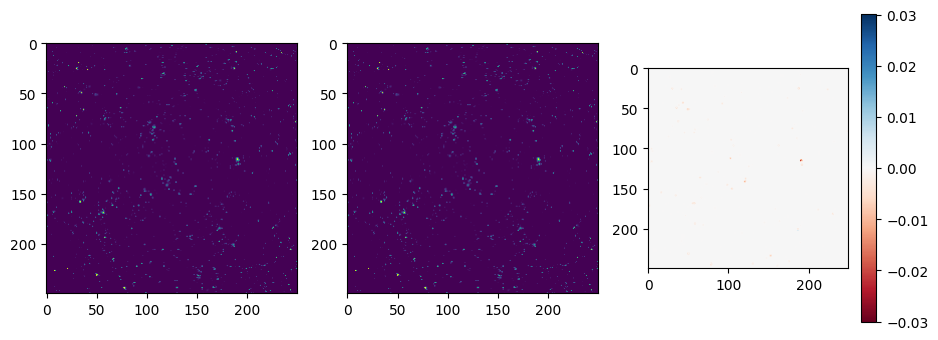

In [83]:
fig, ax = plt.subplots(1,3,figsize=(11,4))
ax[0].imshow(slice_pyc2ray)
ax[1].imshow(slice_c2ray)
imdiff = ax[2].imshow(diff,cmap='RdBu',norm=diffnorm)
plt.colorbar(imdiff)

In [100]:
diff.shape

(250, 250)

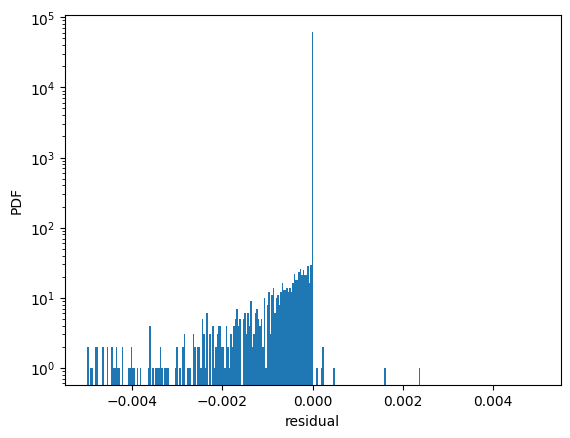

(None, None)

<Figure size 640x480 with 0 Axes>

In [102]:
xbin = np.linspace(-5e-3, 5e-3, 300)
N = 250
Ncells = N**2
wghts = np.ones(Ncells) / Ncells
plt.hist(diff.flatten(), bins=xbin)
plt.yscale('log')
plt.ylabel('PDF'), plt.xlabel('residual')
plt.show(), plt.clf()